In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\akshayd6\Desktop\MyModels\Loan Default Prediction Capstone\Cleaned Data.csv",index_col = 'Customer_id')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,contact,Campaign_month,day_of_week,duration,campaign,pdays,previous,poutcome,y,Postal Code,State_Name,City_Name,Region_Name
Customer_id,,,,,,,,,,,,,,,,,,,,,,,,,
1,56,services,married,high school,no,no,yes,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,307,1,999,0,nonexistent,no,42420,Kentucky,Henderson,South
2,45,services,married,basic 9y,unknown,no,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,198,1,999,0,nonexistent,no,42420,Kentucky,Henderson,South
3,59,admin,married,professional course,no,no,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,139,1,999,0,nonexistent,no,90036,California,Los Angeles,West
4,41,blue collar,married,university degree,unknown,no,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,217,1,999,0,nonexistent,no,33311,Florida,Fort Lauderdale,South
5,24,technician,single,professional course,no,yes,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,380,1,999,0,nonexistent,no,33311,Florida,Fort Lauderdale,South


### Economic Data

In [6]:
eco_data = df[['employee_variation_rate','consumer_price_index','consumer_confidence_index','euribor','number_employed']]

In [7]:
eco_data.head()

,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed
Customer_id,,,,,
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
5,1.1,93.994,-36.4,4.857,5191.0


<AxesSubplot:>

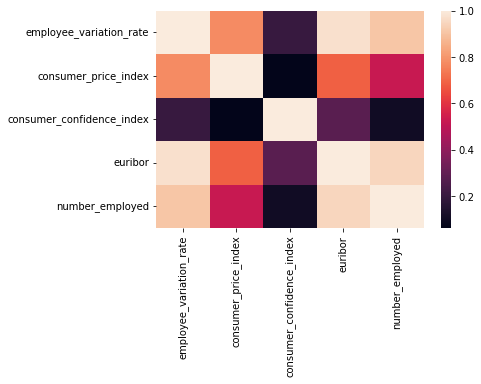

In [8]:
plt.figure(figsize = (6,4))
sns.heatmap(eco_data.corr())

### Other numeric data

In [9]:
l2 = df[['age','duration','campaign','previous','pdays']]

<AxesSubplot:>

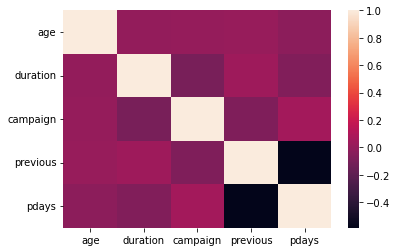

In [10]:
sns.heatmap(l2.corr())

### Statistical tests

<b>Statistical tests for feature selection.</b><br>
1. Chi-Square - To check whether two categorical variables are independent.<br>
2. T-test - To check whether one categorical variable(2 categories) and 1 continuos variable are independent.<br>
3. ANOVA - To check whether one categorical variable(2+ categories) and 1 continuos variable are independent.<br>
4. Correlation - To check whether two numeric variables are independent.

### Chi square:

<b>H0</b> = The variables are independent, there is no relationship between the two categorical variables.<br>
<b>H1</b> = The variables are dependent, there is a relationship between the two categorical variables.

In [11]:
from scipy.stats import chi2_contingency

In [12]:
def chisq(data):
    stat, p, dof, expected = chi2_contingency(data)
    print("P-Value: ",round(p,10))
    if p > 0.05:
        print("Since p > 0.05, we accept the null hypothesis. The variables are independent")
    else:
        print("Since p < 0.05, we reject the null hypothesis. The variables are dependent")

In [13]:
# categorical variables being tested against dependent variable
cat_columns = ['job','marital','education','default','housing','loan','contact','Campaign_month',
          'day_of_week','campaign','pdays','previous','poutcome','Postal Code','State_Name','City_Name',
          'Region_Name']

In [14]:
for i in cat_columns:
    crosstab = pd.crosstab(df[i],df.y)
    print("Y and ",i,"***********************************************************************")
    chisq(crosstab)

Y and  job ***********************************************************************
P-Value:  0.0
Since p < 0.05, we reject the null hypothesis. The variables are dependent
Y and  marital ***********************************************************************
P-Value:  0.0
Since p < 0.05, we reject the null hypothesis. The variables are dependent
Y and  education ***********************************************************************
P-Value:  0.0
Since p < 0.05, we reject the null hypothesis. The variables are dependent
Y and  default ***********************************************************************
P-Value:  0.0
Since p < 0.05, we reject the null hypothesis. The variables are dependent
Y and  housing ***********************************************************************
P-Value:  0.0343738489
Since p < 0.05, we reject the null hypothesis. The variables are dependent
Y and  loan ***********************************************************************
P-Value:  0.3248425807
Since 

>From the above test we can remove the variables that are independent. (loan,State_name,Region_name)

### ANOVA

<b>HO</b> = The two variables are independent<br>
<b>H1</b> = The two variables are dependant

In [15]:
from scipy.stats import f_oneway

In [16]:
def anova(str):
    for i in num_columns:
        CategoryGroupLists = df.groupby('y')[i].apply(list)
        anova_result = f_oneway(*CategoryGroupLists)
        print("Y and ",i,"***********************************************************************")
        print("P-Value: ",round(anova_result[1],10))
        if anova_result[1] > 0.05:
            print("Since p > 0.05, we accept the null hypothesis. The variables are independent")
        else:
             print("Since p > 0.05, we accept the null hypothesis. The variables are dependent")

In [17]:
#numeric variables being tested against dependent variable
num_columns = ['age','employee_variation_rate','consumer_price_index','consumer_confidence_index','euribor',
              'number_employed','duration']

In [18]:
anova(num_columns)

Y and  age ***********************************************************************
P-Value:  3.75319e-05
Since p > 0.05, we accept the null hypothesis. The variables are dependent
Y and  employee_variation_rate ***********************************************************************
P-Value:  0.0
Since p > 0.05, we accept the null hypothesis. The variables are dependent
Y and  consumer_price_index ***********************************************************************
P-Value:  0.0
Since p > 0.05, we accept the null hypothesis. The variables are dependent
Y and  consumer_confidence_index ***********************************************************************
P-Value:  0.0
Since p > 0.05, we accept the null hypothesis. The variables are dependent
Y and  euribor ***********************************************************************
P-Value:  0.0
Since p > 0.05, we accept the null hypothesis. The variables are dependent
Y and  number_employed **********************************************

### Removing unwanted variables

Removing variables loan, State_name, Region_name, default,Postal_Code,poutcome,pdays

In [19]:
df.drop(columns = ['loan','State_Name','Region_Name','Postal Code','poutcome','pdays'],axis = 1,inplace = True)

In [20]:
df.head()

,age,job,marital,education,default,housing,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,contact,Campaign_month,day_of_week,duration,campaign,previous,y,City_Name
Customer_id,,,,,,,,,,,,,,,,,,,
1,56,services,married,high school,no,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,307,1,0,no,Henderson
2,45,services,married,basic 9y,unknown,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,198,1,0,no,Henderson
3,59,admin,married,professional course,no,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,139,1,0,no,Los Angeles
4,41,blue collar,married,university degree,unknown,no,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,217,1,0,no,Fort Lauderdale
5,24,technician,single,professional course,no,yes,1.1,93.994,-36.4,4.857,5191.0,telephone,may,mon,380,1,0,no,Fort Lauderdale


In [21]:
df.shape

(37084, 19)

>We will prepare two datasets - one with default variable and one without default variable and compare models build using these datasets.

### Dataset with 'default' variable

In [22]:
for i in range(0,df.shape[0]):
    if df.default.iloc[i] == 'unknown':
        df.default.iloc[i] = 'yes'

C:\Users\akshayd6\AppData\Local\Temp\ipykernel_9556\48701945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.default.iloc[i] = 'yes'


### Dummy variable conversion

#### Categorical variables 'education' and 'job' will be encoeded using Ordinal encoding. Other categorical variables will be one hot encoded.

In [44]:
cat_dummies = ['job','marital','education','default','housing','contact','Campaign_month',
          'day_of_week','campaign','previous','City_Name']

In [45]:
len(cat_dummies)

11

### Ordinal Encoding

In [25]:
for i in range(0,df.shape[0]):
    if df.education.iloc[i] == 'illiterate':
        df.education.iloc[i] = 0
    elif df.education.iloc[i] == 'basic 4y':
        df.education.iloc[i] = 1
    elif df.education.iloc[i] == 'basic 6y':
        df.education.iloc[i] = 2
    elif df.education.iloc[i] == 'high school':
        df.education.iloc[i] = 4
    elif df.education.iloc[i] == 'university degree':
        df.education.iloc[i] = 5
    elif df.education.iloc[i] == 'professional course':
        df.education.iloc[i] = 6
    else:
        df.education.iloc[i] = 3

C:\Users\akshayd6\AppData\Local\Temp\ipykernel_9556\3794357989.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education.iloc[i] = 4
C:\Users\akshayd6\AppData\Local\Temp\ipykernel_9556\3794357989.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education.iloc[i] = 3
C:\Users\akshayd6\AppData\Local\Temp\ipykernel_9556\3794357989.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education.iloc[i] = 6
C:\Users\akshayd6

In [26]:
df.education.value_counts()

5    12520
4     8542
3     5421
6     4746
1     3765
2     2074
0       16
Name: education, dtype: int64

In [27]:
for i in range(0,df.shape[0]):
    if df.job.iloc[i] == 'unemployed':
        df.job.iloc[i] = 0
    elif df.job.iloc[i] == 'student':
        df.job.iloc[i] = 1
    elif df.job.iloc[i] == 'retired':
        df.job.iloc[i] = 2
    elif df.job.iloc[i] == 'housemaid':
        df.job.iloc[i] = 3
    elif df.job.iloc[i] == 'self-employed':
        df.job.iloc[i] = 4
    elif df.job.iloc[i] == 'technician':
        df.job.iloc[i] = 5
    elif df.job.iloc[i] == 'services':
        df.job.iloc[i] = 6
    elif df.job.iloc[i] == 'entrepreneur':
        df.job.iloc[i] = 7
    elif df.job.iloc[i] == 'management':
        df.job.iloc[i] = 8
    elif df.job.iloc[i] == 'admin':
        df.job.iloc[i] = 9
    elif df.job.iloc[i] == 'blue collar':
        df.job.iloc[i] = 10

C:\Users\akshayd6\AppData\Local\Temp\ipykernel_9556\910182380.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.job.iloc[i] = 6
C:\Users\akshayd6\AppData\Local\Temp\ipykernel_9556\910182380.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.job.iloc[i] = 9
C:\Users\akshayd6\AppData\Local\Temp\ipykernel_9556\910182380.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.job.iloc[i] = 10
C:\Users\akshayd6\AppData\Local\Temp

In [28]:
df.job.value_counts()

9     9726
10    8314
5     6096
6     3547
8     2637
2     1541
7     1309
4     1276
3      946
0      925
1      767
Name: job, dtype: int64

In [29]:
final_dataset = df[num_columns].copy()

In [30]:
final_dataset['job'] = df.job
final_dataset['education'] = df.education

In [31]:
d1 = pd.get_dummies(df.marital,prefix = 'marital_',drop_first = True)
final_dataset = pd.concat([final_dataset,d1],axis = 1)
d2 = pd.get_dummies(df.default,prefix = 'default_',drop_first = True)
final_dataset = pd.concat([final_dataset,d2],axis = 1)
d3 = pd.get_dummies(df.housing,prefix = 'housing_',drop_first = True)
final_dataset = pd.concat([final_dataset,d3],axis = 1)
d4 = pd.get_dummies(df.contact,prefix = 'contact_',drop_first = True)
final_dataset = pd.concat([final_dataset,d4],axis = 1)
d5 = pd.get_dummies(df.Campaign_month,prefix = 'Campaign_month_',drop_first = True)
final_dataset = pd.concat([final_dataset,d5],axis = 1)
d6 = pd.get_dummies(df.day_of_week,prefix = 'day_of_week_',drop_first = True)
final_dataset = pd.concat([final_dataset,d6],axis = 1)
d7 = pd.get_dummies(df.campaign,prefix = 'campaign_',drop_first = True)
final_dataset = pd.concat([final_dataset,d7],axis = 1)
d8 = pd.get_dummies(df.previous,prefix = 'previous_',drop_first = True)
final_dataset = pd.concat([final_dataset,d8],axis = 1)
d9 = pd.get_dummies(df.City_Name)
final_dataset = pd.concat([final_dataset,d9],axis = 1)
d10 = pd.get_dummies(df.y,drop_first=True)
final_dataset = pd.concat([final_dataset,d10],axis = 1,)

In [32]:
final_dataset.rename(columns = {'yes':'target'},inplace = True)

In [33]:
final_dataset.head()

,age,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,duration,job,education,marital__married,marital__single,default__yes,housing__yes,contact__telephone,Campaign_month__aug,Campaign_month__dec,Campaign_month__jul,Campaign_month__jun,Campaign_month__mar,Campaign_month__may,Campaign_month__nov,Campaign_month__oct,Campaign_month__sep,day_of_week__mon,day_of_week__thu,day_of_week__tue,day_of_week__wed,campaign__2,campaign__3,campaign__4,campaign__5,campaign__6,campaign__7,campaign__8,campaign__9,campaign__10,campaign__11,campaign__12,campaign__13,campaign__14,campaign__15,campaign__16,campaign__17,campaign__18,campaign__19,campaign__20,campaign__21,campaign__22,campaign__23,campaign__24,campaign__25,campaign__26,campaign__27,campaign__28,campaign__29,campaign__30,campaign__31,campaign__32,campaign__33,campaign__34,campaign__35,campaign__37,campaign__39,campaign__40,campaign__41,campaign__42,campaign__43,campaign__56,previous__1,previous__2,previous__3,previous__4,previous__5,previous__6,previous__7,Aberdeen,Abilene,Akron,Albuquerque,Alexandria,Allen,Allentown,Altoona,Amarillo,Anaheim,Andover,Ann Arbor,Antioch,Apopka,Apple Valley,Appleton,Arlington,Arlington Heights,Arvada,Asheville,Athens,Atlanta,Atlantic City,Auburn,Aurora,Austin,Avondale,Bakersfield,Baltimore,Bangor,Bartlett,Bayonne,Baytown,Beaumont,Bedford,Belleville,Bellevue,Bellingham,Bethlehem,Beverly,Billings,Bloomington,Boca Raton,Boise,Bolingbrook,Bossier City,Bowling Green,Boynton Beach,Bozeman,Brentwood,Bridgeton,Bristol,Broken Arrow,Broomfield,Brownsville,Bryan,Buffalo,Buffalo Grove,Bullhead City,Burbank,Burlington,Caldwell,Camarillo,Cambridge,Canton,Carlsbad,Carol Stream,Carrollton,Cary,Cedar Hill,Cedar Rapids,Champaign,Chandler,Chapel Hill,Charlotte,Charlottesville,Chattanooga,Chesapeake,Chester,Cheyenne,Chicago,Chico,Chula Vista,Cincinnati,Citrus Heights,Clarksville,Cleveland,Clifton,Clinton,Clovis,Coachella,College Station,Colorado Springs,Columbia,Columbus,Commerce City,Concord,Conroe,Conway,Coon Rapids,Coppell,Coral Gables,Coral Springs,Corpus Christi,Costa Mesa,Cottage Grove,Covington,Cranston,Cuyahoga Falls,Dallas,Danbury,Danville,Davis,Daytona Beach,Dearborn,Dearborn Heights,Decatur,Deer Park,Delray Beach,Deltona,Denver,Des Moines,Des Plaines,Detroit,Dover,Draper,Dublin,Dubuque,Durham,Eagan,East Orange,East Point,Eau Claire,Edinburg,Edmond,Edmonds,El Cajon,El Paso,Elkhart,Elmhurst,Elyria,Encinitas,Englewood,Escondido,Eugene,Evanston,Everett,Fairfield,Fargo,Farmington,Fayetteville,Florence,Fort Collins,Fort Lauderdale,Fort Worth,Frankfort,Franklin,Freeport,Fremont,Fresno,Frisco,Gaithersburg,Garden City,Garland,Gastonia,Georgetown,Gilbert,Gladstone,Glendale,Glenview,Goldsboro,Grand Island,Grand Prairie,Grand Rapids,Grapevine,Great Falls,Greeley,Green Bay,Greensboro,Greenville,Greenwood,Gresham,Grove City,Gulfport,Hackensack,Hagerstown,Haltom City,Hamilton,Hampton,Harlingen,Harrisonburg,Hattiesburg,Helena,Hempstead,Henderson,Hendersonville,Hesperia,Hialeah,Hickory,Highland Park,Hillsboro,Holland,Hollywood,Holyoke,Homestead,Hoover,Hot Springs,Houston,Huntington Beach,Huntsville,Independence,Indianapolis,Inglewood,Iowa City,Irving,Jackson,Jacksonville,Jamestown,Jefferson City,Johnson City,Jonesboro,Jupiter,Keller,Kenner,Kenosha,Kent,Kirkwood,Kissimmee,Knoxville,La Crosse,La Mesa,La Porte,La Quinta,Lafayette,Laguna Niguel,Lake Charles,Lake Elsinore,Lake Forest,Lakeland,Lakeville,Lakewood,Lancaster,Lansing,Laredo,Las Cruces,Las Vegas,Laurel,Lawrence,Lawton,Layton,League City,Lebanon,Lehi,Leominster,Lewiston,Lincoln Park,Linden,Lindenhurst,Little Rock,Littleton,Lodi,Logan,Long Beach,Longmont,Longview,Lorain,Los Angeles,Louisville,Loveland,Lowell,Lubbock,Macon,Madison,Malden,Manchester,Manhattan,Mansfield,Manteca,Maple Grove,Margate,Marietta,Marion,Marlborough,Marysville,Mason,Mcallen,Medford,Medina,Melbourne,Memphis,Mentor,Meriden,Meridian,Mesa,Mesquite,Miami,Middletown,Midland,Milford,Milwaukee,Minneapolis,Miramar,Misha

In [34]:
final_dataset.shape

(37084, 607)

In [39]:
final_dataset.target.value_counts(normalize = True)

0    0.886528
1    0.113472
Name: target, dtype: float64

In [40]:
#dataset with default
final_dataset.to_csv("Dataset with default.csv")

In [42]:
final_dataset.drop(columns = ['default__yes'],axis = 1,inplace = True)

In [43]:
#dataset without default
final_dataset.to_csv("Dataset without default.csv")